## Beginner Tutorial

### Key Skills for Data Science

1. **Basic Tools**: Familiarity with a few essential tools like Python, R, or SQL is helpful, but Python is often enough. Focus on mastering Python as it's widely used and versatile.

2. **Basic Statistics**: Understanding foundational concepts like mean, median, and standard deviation will make it easier to analyze data and use Python effectively.

3. **Data Munging**: The ability to clean and format messy or inconsistent data (like handling dates and strings) is crucial. Python offers powerful tools for data cleaning.

4. **Data Visualization**: Visualizing data helps in understanding insights. Libraries like Matplotlib and Seaborn in Python are excellent for creating meaningful visualizations.

5. **Machine Learning**: A deep knowledge of the math behind machine learning isn’t necessary. Focus on understanding the basics and learning how to implement algorithms in Python.

In [10]:
# basic Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# load the datat files



In [11]:
# Load CSV files from the archive folder
combats_df = pd.read_csv('archive/combats.csv')
pokemon_df = pd.read_csv('archive/pokemon.csv')
tests_df = pd.read_csv('archive/tests.csv')

# Display the first few rows of each DataFrame to verify loading
print("Combats Data:")
display(combats_df.head())

print("Pokemon Data:")
display(pokemon_df.head())

print("Tests Data:")
display(tests_df.head())

Combats Data:


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


Pokemon Data:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Tests Data:


,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


Let's see more information on this csv files

In [12]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


There are non-numeric columns in `pokemon_df`, such as names or categorical data, which will prevent the correlation calculation. To fix this, we need to exclude non-numeric columns before calculating the correlation matrix.

In [15]:
# Select only the numeric columns in pokemon_df
numeric_pokemon_df = pokemon_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data
correlation_matrix = numeric_pokemon_df.corr()

# Display the correlation matrix
print("Correlation matrix for numeric columns in pokemon_df:")
display(correlation_matrix)

Correlation matrix for numeric columns in pokemon_df:


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


•	`pokemon_df.select_dtypes(include=['float64', 'int64'])` selects only the columns with numeric data types (float64 and int64), excluding any columns with strings or other non-numeric data types.


•	We then calculate the correlation on the filtered DataFrame (numeric_pokemon_df) and display the resulting correlation matrix.

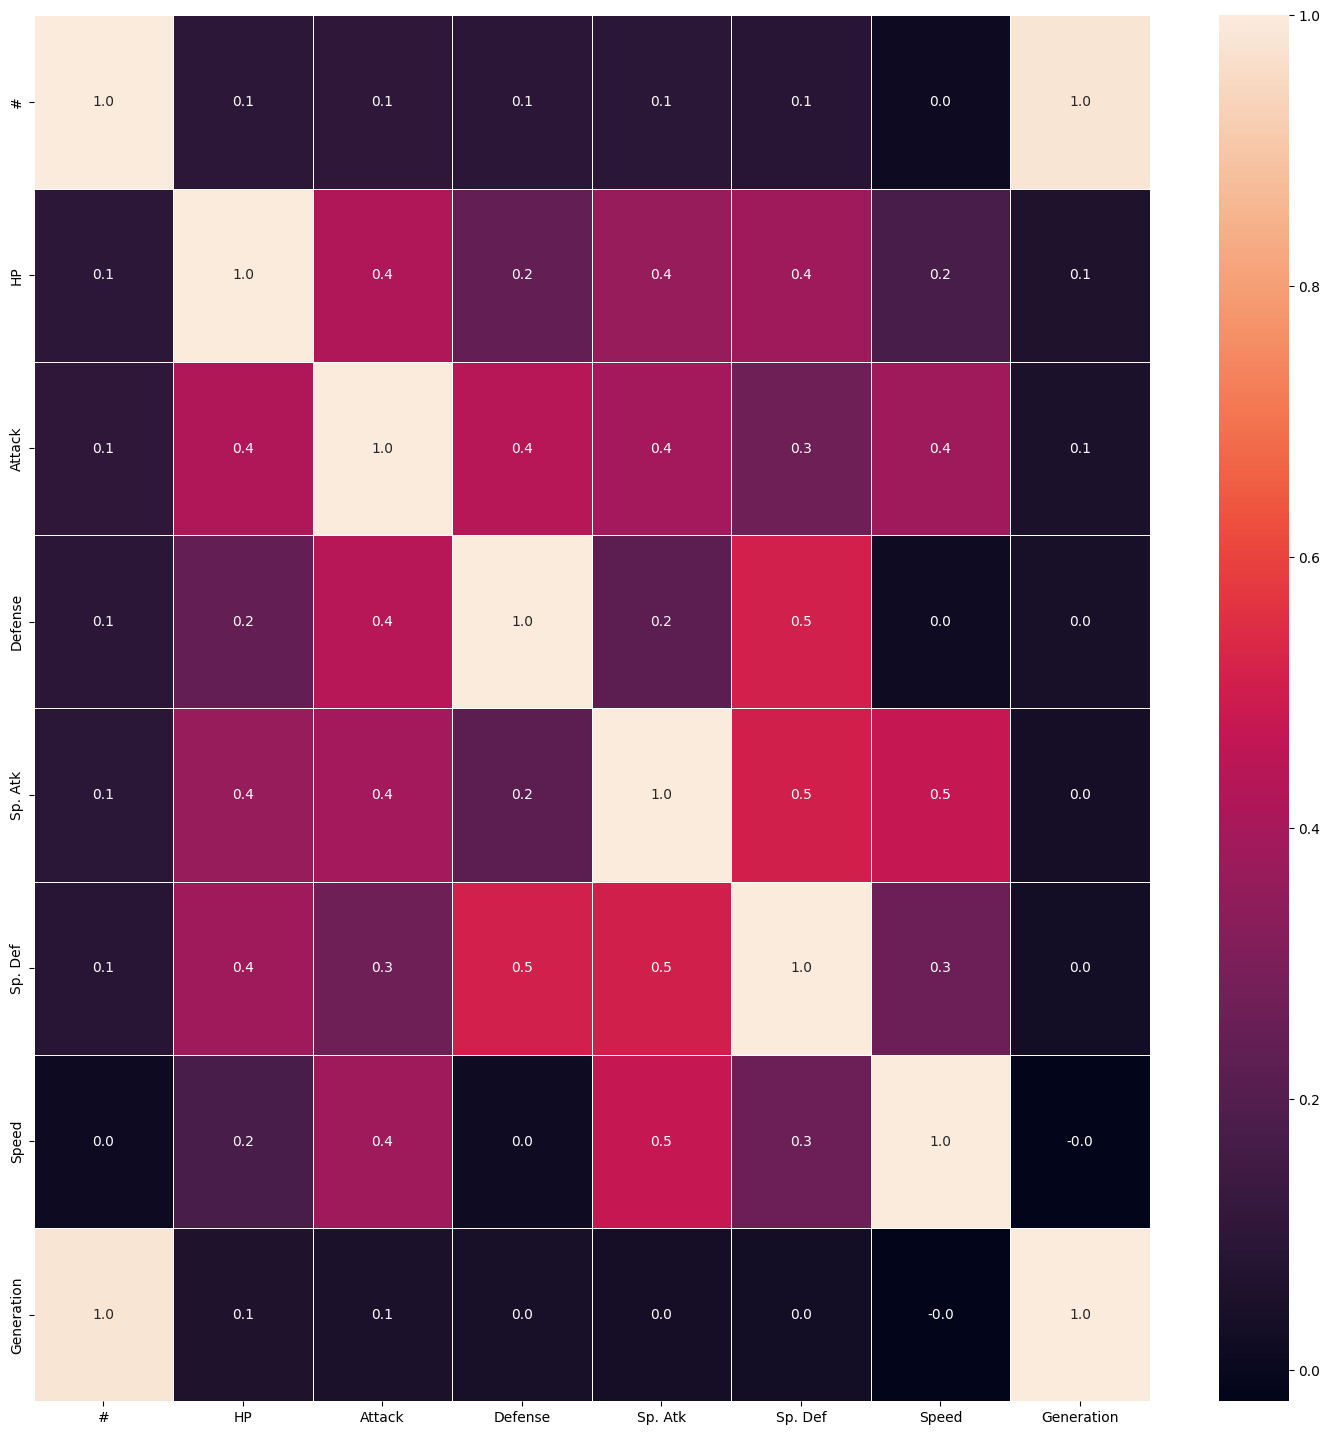

In [16]:
# correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [17]:
pokemon_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Matplotlib

It helps us in plotting data, like simple line plot, scatter plot or histograms, it's up to you to decide which plots suits your data most.

#### Line Plot

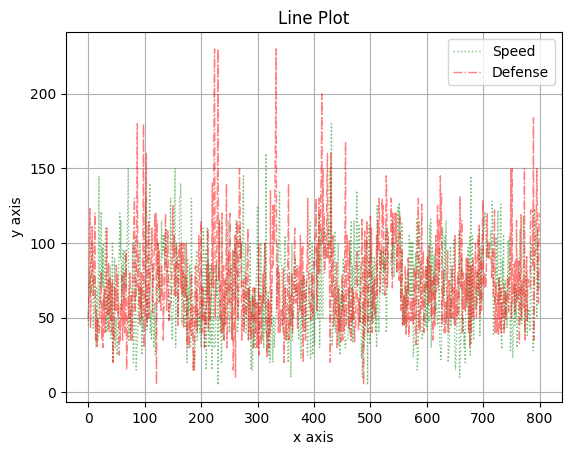

In [18]:
pokemon_df.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
pokemon_df.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

#### Scatter Plot

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

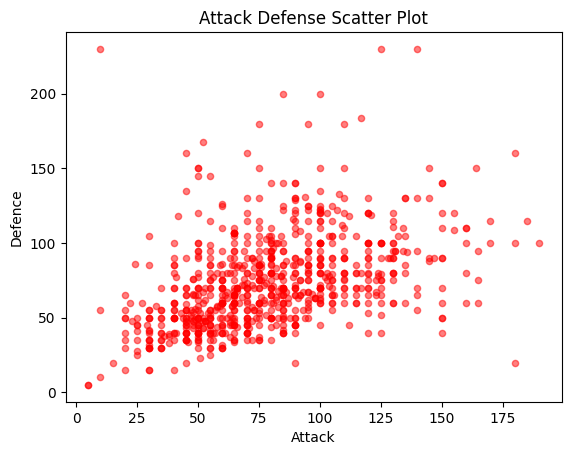

In [19]:
pokemon_df.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

#### Histogram

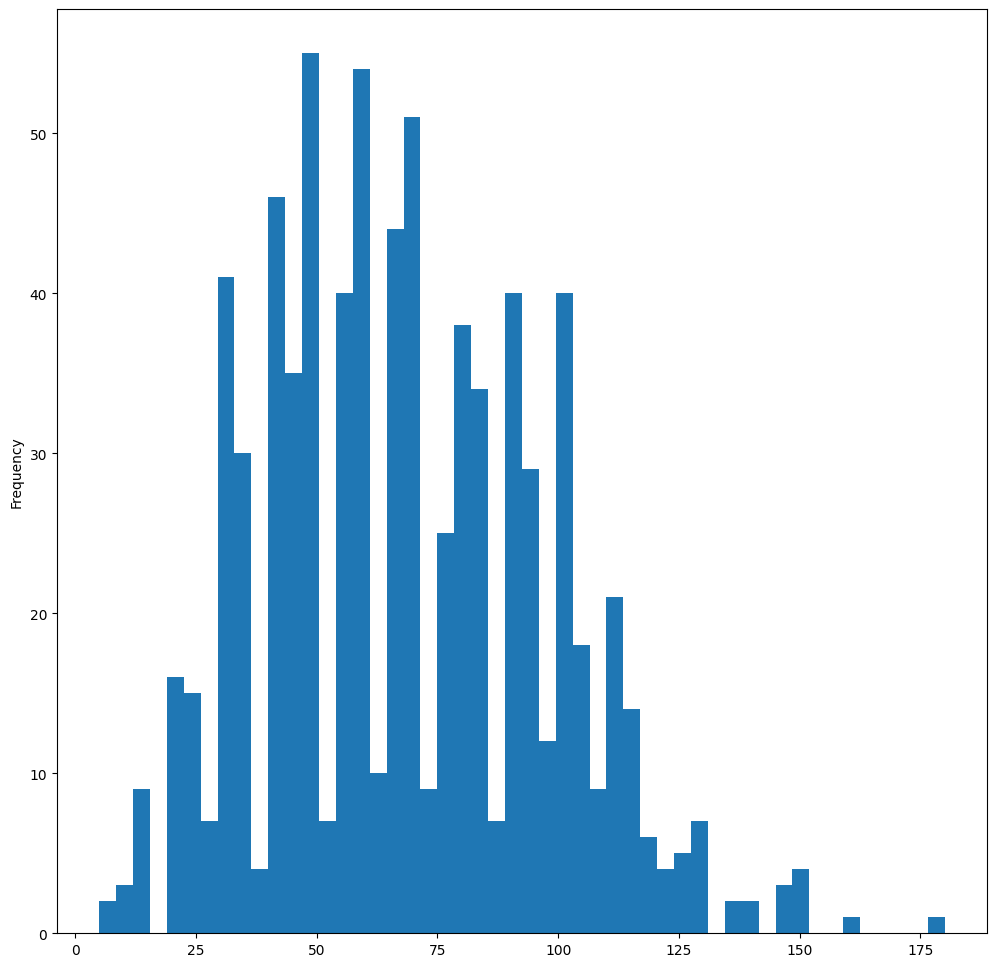

In [20]:
pokemon_df.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

### Dictionary

### Why Do We Need a Dictionary?

- A dictionary stores data in **key-value pairs**.
- It allows **faster data retrieval** than lists when searching by key.
- **Example**:
  ```python
  dictionary = {'spain': 'madrid'}

- Key: 'spain'
- Value: 'madrid'


In [23]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


#### Key Characteristics of Dictionary Keys

1. **Keys Must Be Immutable**:
   - Dictionary keys need to be immutable, meaning they cannot be changed after creation.
   - This is why data types like **strings**, **booleans**, **floats**, **integers**, and **tuples** can be used as keys since they are immutable.
   - **Lists** cannot be used as keys because they are mutable (i.e., they can be changed after creation).

2. **Keys Are Unique**:
   - Each key in a dictionary must be unique. If a dictionary has duplicate keys, the last assigned value to the key will overwrite the previous one.
   - This uniqueness ensures that each key-value pair is distinct and can be accessed individually.

#### Example
Consider a dictionary that maps countries to their capitals:
- If we use `"Spain"` as the key with `"Madrid"` as its value, `"Spain"` must be unique in the dictionary.
- Attempting to add another entry with the key `"Spain"` will overwrite the previous value (`"Madrid"`) with the new value.

By ensuring keys are immutable and unique, dictionaries provide efficient and reliable data retrieval, allowing us to map specific keys to values and quickly access them.

In [25]:
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)

dictionary['france'] = "paris"       # Add new entry
print(dictionary)

del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)

print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict

print(dictionary)

{'spain': 'barcelona'}
{'spain': 'barcelona', 'france': 'paris'}
{'france': 'paris'}
True
{}


### Pandas Library

**Pandas** is a powerful and popular Python library used for data manipulation and analysis. It provides data structures and functions to make data handling more accessible, especially with large datasets. Pandas is particularly useful for tasks such as cleaning, transforming, and analyzing structured data.

#### Key Features:
- **Data Structures**: 
  - **Series**: A one-dimensional labeled array, similar to a list or column in a spreadsheet.
  - **DataFrame**: A two-dimensional labeled data structure, similar to a table in a database or an Excel spreadsheet, where each column can be of a different data type.

- **Data Handling**:
  - Allows easy handling of missing data.
  - Supports powerful indexing and selection of data.
  - Enables merging and joining of different datasets.

- **Data Operations**:
  - Provides built-in functions for aggregating, filtering, and grouping data.
  - Simplifies tasks like data reshaping, pivoting, and applying custom functions.

#### Example Use Cases:
- Analyzing financial data.
- Cleaning and transforming large datasets for machine learning.
- Time-series analysis.

With its intuitive syntax and rich functionality, Pandas is a fundamental tool in data science and analytics.

In [27]:
series = pokemon_df['Defense']        # pandas series
print(type(series))

data_frame = pokemon_df[['Defense']]  # pandas data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Logic, Control Flow, and Filtering

#### Logic
- **Logic** in programming refers to the use of **logical operators** and **conditions** to make decisions within code.
- Common logical operators include:
  - **AND** (`and`): Returns `True` if both conditions are true.
  - **OR** (`or`): Returns `True` if at least one condition is true.
  - **NOT** (`not`): Inverts the truth value.
- Logic helps control the behavior of programs based on different conditions, making it essential for decision-making and building complex workflows.

#### Control Flow
- **Control Flow** determines the order in which statements and functions execute in a program.
- Key control flow structures include:
  - **if-elif-else statements**: Execute code based on specified conditions.
  - **Loops**:
    - **for loops**: Repeat code for each item in a sequence.
    - **while loops**: Repeat code as long as a condition is true.
- Control flow structures allow programs to execute certain blocks of code selectively and repetitively, enhancing flexibility and efficiency.

#### Filtering
- **Filtering** is the process of selecting a subset of data that meets specified criteria.
- In data manipulation, filtering allows us to isolate specific rows or values in a dataset based on conditions.
- Commonly used in libraries like Pandas to quickly extract relevant data, for example, filtering rows in a DataFrame based on values in a specific column.
- Filtering is useful for focusing on relevant information, reducing data size, and preparing datasets for analysis.

Together, logic, control flow, and filtering enable developers to build responsive, efficient, and targeted applications by controlling how data and code execute based on various conditions.

In [28]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


#### Filtering

In [29]:
x = pokemon_df['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
pokemon_df[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


#### Filtering with Logical AND

In [30]:
pokemon_df[np.logical_and(pokemon_df['Defense']>200, pokemon_df['Attack']>100 )]

# pokeons with higher defense than 200 and higher attack than 100, there are only 2 pokemons

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [31]:
# & can be used instead
pokemon_df[(pokemon_df['Defense']>200) & (pokemon_df['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


### While and For Loops

#### While Loop
- A **while loop** is a control flow statement that repeatedly executes a block of code as long as a specified condition is true.
- The loop checks the condition before each iteration, and if the condition is `True`, the code block runs. Once the condition becomes `False`, the loop stops.
- **Example Use Case**: Repeating a task until a certain threshold is reached, such as prompting a user for input until they provide a valid response.

#### For Loop
- A **for loop** iterates over a sequence (like a list, tuple, or range) and executes a block of code once for each item in the sequence.
- The loop ends after all items in the sequence have been processed.
- **Example Use Case**: Processing each item in a collection, such as calculating the sum of a list of numbers or printing each character in a string.

#### Key Differences
- **While loop**: Used when the number of iterations is unknown, and the loop should run based on a condition.
- **For loop**: Used when you need to iterate over a specific sequence or a fixed number of items.

Both `while` and `for` loops are essential for automating repetitive tasks and allow for efficient and concise code.

In [32]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [34]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in pokemon_df[['Attack']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  Attack    49
Name: 0, dtype: int64


### In This Section, You Learned:

- **Importing CSV Files**: How to load data from CSV files for analysis.
- **Plotting Basics**: Creating line plots, scatter plots, and histograms to visualize data.
- **Dictionary Basics**: Key features and usage of dictionaries in Python.
- **Pandas Essentials**: Using core features like filtering, a crucial skill for data science.
- **Looping**: Applying `while` and `for` loops to automate repetitive tasks.